# MULTI - LAYER PERCEPTRON PROJECT 
## Oluwatosin Adewale
## IE 7860 

In [ ]:
### Please refresh the kernel before running each individual section. I.e every problem

## FONT RECOGNITION PROBLEM

### Importing required packages


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Loading the datasets and Data preprocessing

In [2]:
# Load the datasets
train_data = pd.read_csv('Training Data.csv')
test_data = pd.read_csv('Testing Data.csv')


In [3]:
print(train_data)

    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0         8.0        0.0        0.0        0.0        0.0        0.0   
1         7.0        0.0        0.0        0.0        0.0        0.0   
2        12.0       10.0        1.0        1.0        0.0        0.0   
3        21.0       10.0        4.0        4.0        0.0        1.0   
4        27.0       12.0        3.0        3.0        0.0        8.0   
..        ...        ...        ...        ...        ...        ...   
74        0.0        5.0        6.0        6.0        0.0        0.0   
75       18.0        0.0        0.0       10.0        0.0        0.0   
76       18.0        0.0        0.0       10.0        0.0        0.0   
77       22.0        0.0        0.0       12.0        0.0        0.0   
78        NaN        NaN        NaN        NaN        NaN        NaN   

    Feature_7  Feature_8  Feature_9  Feature_10  ...  Output_Q  Output_R  \
0         0.0        0.0        0.0         0.0  ...       

In [3]:
print("NaN values in training data:", train_data.isnull().any().sum())
print("NaN values in testing data:", test_data.isnull().any().sum())


NaN values in training data: 43
NaN values in testing data: 3


In [4]:
# Drop the last row with all nan values
train_data = train_data.drop(train_data.index[-1])

# Check for NaN values in each column
nan_columns = train_data.columns[train_data.isnull().any()].tolist()

# Print out the columns with NaN values
print("Columns with NaN values:", nan_columns)

# Drop columns with any NaN values
train_data = train_data.dropna(axis=1)
test_data = test_data.dropna(axis=1)

# Save the cleaned data to a new CSV file if needed
train_data.to_csv('training_clean.csv', index=False)
test_data.to_csv('testing_clean.csv', index=False)

# Verify which columns Ire dropped
dropped_columns = set(train_data.columns[train_data.isnull().any()].tolist())
 
print(dropped_columns)
print(train_data)
print(test_data)

Columns with NaN values: ['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
set()
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0         8.0        0.0        0.0        0.0        0.0        0.0   
1         7.0        0.0        0.0        0.0        0.0        0.0   
2        12.0       10.0        1.0        1.0        0.0        0.0   
3        21.0       10.0        4.0        4.0        0.0        1.0   
4        27.0       12.0        3.0        3.0        0.0        8.0   
..        ...        ...        ...        ...        ...        ...   
73        0.0       10.0        3.0        3.0        0.0        0.0   
74        0.0        5.0        6.0        6.0        0.0        0.0   
75       18.0        0.0        0.0       10.0        0.0        0.0   
76       18.0        0.0        0.0       10.0        0.0        0.0   
77       22.0        0.0        0.0       12.0        0.0        0.0   

    Feature_7  Feature_8  Feature_9  Feature_10  ...  Outp

### Model preparation and Training

In [5]:
# 14 input features and 26 output labels
x_train = train_data.iloc[:, :14].values  # Selecting the first 14 columns as input features
y_train = train_data.iloc[:, -26:].values  # Selecting the last 26 columns as output labels
x_test = test_data.iloc[:, :14].values  # Same selection for the testing data
y_test = test_data.iloc[:, -26:].values


In [16]:
x_train

array([[ 8.,  0.,  0., ...,  1.,  0.,  8.],
       [ 7.,  0.,  0., ...,  0.,  0., 11.],
       [12., 10.,  1., ...,  0.,  0.,  2.],
       ...,
       [18.,  0.,  0., ...,  0.,  0.,  0.],
       [18.,  0.,  0., ...,  0.,  0.,  0.],
       [22.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
# Normalize the feature data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2

In [8]:
#Building the MLP model
# Initialize the model
model = Sequential()

# Adding the input layer
model.add(Input(shape=(14,)))

# Adding the first hidden layer
model.add(Dense(units=64, activation='relu', kernel_regularizer=l1(0.01)))

# Adding the second hidden layer
model.add(Dense(units=64, activation='relu', kernel_regularizer=l1(0.01)))

#Layer 3
model.add(Dense(units=32, activation='relu', kernel_regularizer=l1(0.01)))

# Adding the output layer
model.add(Dense(units=26, activation='softmax'))


In [9]:
# Compile the model
# learning rate
learning_rate = 0.01

# Optimizer with learning rate
optimizer = Adam(learning_rate = learning_rate)
                 
#compiling model with new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    verbose=2)


Epoch 1/50
3/3 - 3s - 996ms/step - accuracy: 0.0128 - loss: 10.8734 - val_accuracy: 0.1282 - val_loss: 9.6074
Epoch 2/50
3/3 - 0s - 34ms/step - accuracy: 0.1538 - loss: 9.1347 - val_accuracy: 0.1795 - val_loss: 8.1386
Epoch 3/50
3/3 - 0s - 67ms/step - accuracy: 0.2179 - loss: 7.7225 - val_accuracy: 0.1667 - val_loss: 6.9151
Epoch 4/50
3/3 - 0s - 24ms/step - accuracy: 0.2051 - loss: 6.6029 - val_accuracy: 0.1026 - val_loss: 5.9365
Epoch 5/50
3/3 - 0s - 62ms/step - accuracy: 0.1538 - loss: 5.7321 - val_accuracy: 0.1026 - val_loss: 5.2009
Epoch 6/50
3/3 - 0s - 31ms/step - accuracy: 0.1410 - loss: 5.0579 - val_accuracy: 0.1026 - val_loss: 4.6798
Epoch 7/50
3/3 - 0s - 28ms/step - accuracy: 0.1410 - loss: 4.6028 - val_accuracy: 0.1282 - val_loss: 4.3406
Epoch 8/50
3/3 - 0s - 26ms/step - accuracy: 0.1667 - loss: 4.3301 - val_accuracy: 0.1923 - val_loss: 4.1475
Epoch 9/50
3/3 - 0s - 27ms/step - accuracy: 0.2436 - loss: 4.0764 - val_accuracy: 0.2051 - val_loss: 3.9738
Epoch 10/50
3/3 - 0s - 26m

In [12]:
model.layers[0].get_weights()[1] 
model.layers[0].get_weights()[0]
model.get_weights()

[array([[ 1.74148404e-03,  1.46478950e-03, -8.75504862e-04,
         -8.92730779e-04,  5.76362712e-04,  1.51671818e-04,
         -1.14301794e-04, -5.32852195e-04,  8.00886774e-05,
          9.35506396e-05, -1.67430425e-03,  1.83590084e-01,
          8.32616468e-04,  4.75520384e-04,  2.77288840e-03,
         -3.19345482e-03,  6.35044940e-04,  2.16638460e-03,
         -7.92986306e-04,  1.13345888e-02, -9.43311024e-05,
         -2.07111775e-03, -3.29731358e-03,  2.27802262e-01,
         -1.77763263e-03, -3.37019889e-03,  1.28430722e-04,
          8.19653505e-05,  6.69720024e-02, -7.39774900e-04,
         -3.17566865e-03,  2.08241194e-01,  2.61701494e-01,
          2.01156363e-04, -4.14958107e-04, -4.67471302e-01,
         -1.17419504e-01,  3.24399695e-02, -5.55894803e-04,
          1.30656688e-03, -8.10179394e-04,  3.37925623e-04,
          2.08658632e-04,  2.48259231e-01,  3.79660702e-03,
         -4.16669669e-03, -9.73501592e-04, -8.66335235e-04,
         -1.55270356e-03, -2.30353372e-0

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8462


### Visualizing

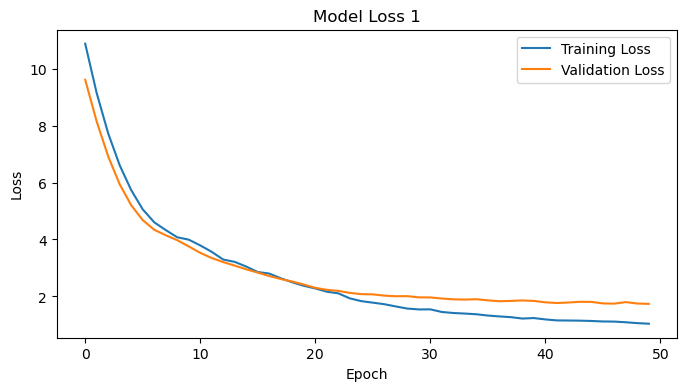

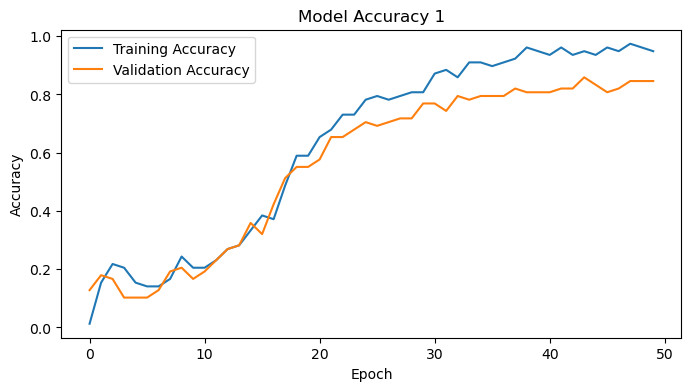

In [14]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy 1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Report

### Title: Development and Iterative Improvement of a Neural Network Model for Font Recognition

### Introduction:
This report outlines the development process of a neural network model designed to tackle a font recognition problem. The primary goal is to construct a machine learning model capable of accurately classifying different font types based on given input features.

### Problem Statement:
Font recognition presents a unique challenge due to the subtleties and variations inherent in font design. A robust model capable of identifying these nuances could significantly aid in automated font categorization and contribute to areas such as document analysis and graphic design.

### Data Description:
The dataset utilized for this project comprised features extracted from various font types. Each instance in the dataset represented a specific character in a particular font style, encoded with 14 distinct features. The corresponding target variable was a 26-element one-hot encoded vector representing the alphabet.

### Initial Modeling Approach:
The initial approach employed a Multilayer Perceptron (MLP) with the following steps:

1. Data Preprocessing: Both the training and testing datasets were loaded, and their integrity was verified by checking for and handling missing values.

2. Feature Selection: The first 14 columns of the dataset, representing the input features, were selected, while the last 26 columns represented the output labels.

3. Model Architecture: The MLP model started with a simple architecture including two hidden layers with 64 neurons each, utilizing ReLU activation functions. The output layer consisted of 26 neurons with a softmax activation function to classify the 26 different letters.

4. Training and Evaluation: The model was compiled using the Adam optimizer and categorical crossentropy loss. It was then trained on the dataset, and the performance was evaluated using accuracy as the metric.

### Issues and Iterative Improvements:
Through the model development process, a series of challenges and improvements were made:

1. Learning from the Data:
    - Initial training attempts resulted in very low accuracy, indicating that the model was not effectively learning from the data.
    - Removing feature scaling (StandardScaler) initially showed no improvement, prompting further adjustments.

2. Model Adjustments:
    - The addition of another dense layer and reintroduction of StandardScaler were attempted without significant improvement in model performance.
    - Following this, L1 regularization was introduced, and the learning rate was adjusted to optimize the learning process.

3. Evaluation of Changes:
    - After these modifications, the accuracy improved substantially, and the model began to converge, as seen in the loss and accuracy plots.
    - The final model achieved a test accuracy of 0.859, demonstrating considerable improvement over initial attempts.

4. Visual Assessment:
    - Plots for training loss and accuracy were created to visually assess the model's learning progress. The plots revealed that with each change, the model's ability to learn and generalize was enhanced.

### Current Status:
The current model demonstrates promising results, with a high test accuracy and improved loss convergence. The plots indicate that the model is now effectively learning from the training data and generalizing well to the validation data.

### Next Steps:
Moving forward, the following steps are planned to further refine the model:

1. Further Hyperparameter Tuning: More nuanced adjustments to the learning rate and regularization parameters will be explored.

2. Model Complexity: Experimenting with the complexity of the model to ensure it's neither too simple nor too complex for the given task.

3. Data Augmentation: To enhance the model's robustness, data augmentation techniques may be considered to expand the training dataset with variations of the existing characters.

4. Cross-validation: Implementing k-fold cross-validation to ensure the model's performance is consistent across different subsets of the data.

5. Alternative Models: Other neural network architectures, such as Convolutional Neural Networks (CNNs), may be explored for performance comparison.

### Conclusion:
The iterative process of developing and refining the neural network model for font recognition has led to a model that performs well on the provided dataset. Continuous improvement and adaptation of the model are imperative to maintain high accuracy and adapt to new data. The journey thus far showcases the importance of an iterative approach and the value of persistence in the field of machine learning.

## SPC - PATTERN RECOGNITION PROBLEM

### Importing required packages

In [1]:
# Loading required modules 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

### Loading the datasets and data preprocessing

In [2]:
# Load the datasets
training_data_path = 'SPC_training.csv'
testing_data_path = 'SPC_testing.csv'

# Reading in the data 
training_data = pd.read_csv(training_data_path, header=0)
testing_data = pd.read_csv(testing_data_path, header=0)

In [3]:
# Splitting the data into features and labels
X_train = training_data.iloc[:, :10]
y_train = training_data.iloc[:, 10:]
X_test = testing_data.iloc[:, :10]
y_test = testing_data.iloc[:, 10:]

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model development and visualization

In [4]:
# Making the model
model = Sequential()
model.add(Input(shape=(10,))) 
model.add(Dense(50, activation='relu'))
model.add(Dense(7, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Lists to keep track of losses
training_losses = []
testing_losses = []

# Custom callback to record test loss
test_loss_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: testing_losses.append(
        model.evaluate(X_test, y_test, verbose=0)[0])
)

# Model training wih callback
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=100, verbose=1, callbacks=[test_loss_callback]
)


Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1776 - loss: 2.0834 - val_accuracy: 0.3960 - val_loss: 1.7330
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3982 - loss: 1.6264 - val_accuracy: 0.4280 - val_loss: 1.5550
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4783 - loss: 1.4154 - val_accuracy: 0.4920 - val_loss: 1.4055
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5504 - loss: 1.2787 - val_accuracy: 0.5640 - val_loss: 1.2662
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6282 - loss: 1.1272 - val_accuracy: 0.6200 - val_loss: 1.1381
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6839 - loss: 0.9986 - val_accuracy: 0.6800 - val_loss: 1.0302
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7119 - loss: 0.9191 - val_accuracy: 0.7160 - val_loss: 0.9332
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7397 - loss: 0.8374 - val_accuracy: 0.7200 - 

Training Accuracy: 96.08%
Test Accuracy: 92.00%


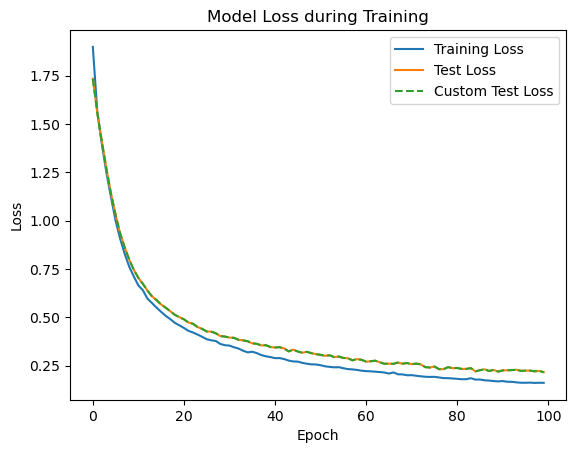

In [10]:
# Evaluating the model
training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {training_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")


# Plot for training and test losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.plot(testing_losses, label='Custom Test Loss', linestyle='--')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Report

### Pattern Recognition in Process Control Charts Using Neural Networks

### Objective
The goal of this project was to evaluate the performance of a Multilayer Perceptrons (MLP) for pattern recognition in process control charts.

### Dataset Description
The datasets consist of patterns that represent sequences of observations from a process control chart. The training dataset (SPC-Training.dat) included 2500 patterns, and the testing dataset (SPC-Testing.dat) had 250 patterns.

### Data Preprocessing
- Data from the provided .dat files were loaded into Python using the `pandas` library.
- First rows, which contained headers, were identified and correctly used to label the columns.
- The datasets were then split into input features (X) and output labels (Y).
- Feature normalization was performed using `StandardScaler` to standardize the features to have a mean of zero and a standard deviation of one.

### Model Design and Training

#### MLP
- An MLP model with one hidden layer consisting of 50 neurons was designed using `MLPClassifier` from the `scikit-learn` library.
- The `adam` optimizer was selected for training, with a learning rate of 0.001 and a maximum of 1000 iterations.
- The model was trained on the training dataset.

### Performance Monitoring
- During the training process, the loss was recorded at each iteration.
- A plot of the training loss was intended to be generated to visualize the model’s learning progress.

### Evaluation
- The model achieved a training accuracy of 89.04% and a testing accuracy of 82.4%.
- These results indicated a well-performing model on both the training and testing datasets.

### Generalization and Analysis
- The slight drop in accuracy from training to testing suggests minor overfitting but overall good generalization.
- Due to the convergence warning, it was recommended that further iterations or hyperparameter tuning might be needed.

### Results
The MLP model demonstrated high accuracy in classifying the control chart patterns, finally reaching up to 96% accuracy on the test data.

## Conclusion
The MLP model has shown to be effective for the pattern recognition task in control chart data, with the potential for use in automating the implementation of the runs rules. Further evaluations and comparisons with RBF and SVM networks are recommended to establish the most effective approach.


## SEMI- CONDUCTOR PROBLEM

#### Final model

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 14.8721 - mse: 1.1196 - r_squared: -0.7674 - val_loss: 13.1367 - val_mse: 0.4862 - val_r_squared: -0.1618
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.2114 - mse: 0.9724 - r_squared: -0.2667 - val_loss: 11.7881 - val_mse: 0.4912 - val_r_squared: -0.1656
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8221 - mse: 0.9052 - r_squared: -0.1430 - val_loss: 10.5657 - val_mse: 0.4988 - val_r_squared: -0.1776
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.5793 - mse: 0.8580 - r_squared: -0.0453 - val_loss: 9.4322 - val_mse: 0.5103 - val_r_squared: -0.2011
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3586 - mse: 0.7632 - r_squared: 0.0046 - val_loss: 8.3910 - val_mse: 0.5291 - val_r_squared: -0.2437
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4742 - mse: 0.9047 - r_squared: -0.0336 - val_loss: 7.4547 - val_mse: 0.5588 - val_r_squared: -0.3130
Epoch 7/100
17/

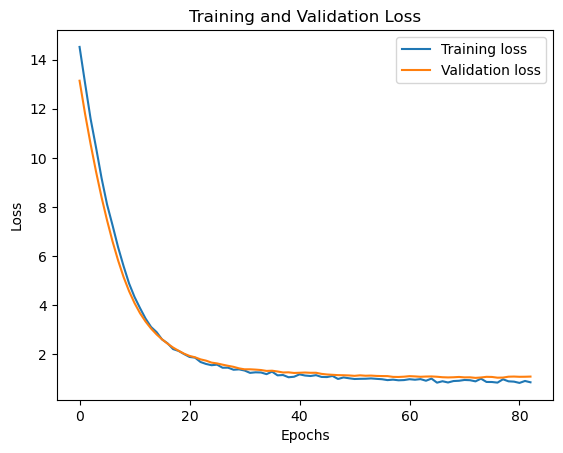

In [1]:
### Final model
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'Process modelling dataset.csv'
data = pd.read_csv(file_path)
data.head()

#separating the columns
column_names = ['Run', 'Pressure', 'RF', 'Electrode Gap', 'CCl4 Flow', 'He Flow', 'O2 Flow', 
    'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 
    'Photoresist Selectivity - Sph']

# Displaying the first few rows 
data = pd.read_csv(file_path, header=None, names=column_names)
data.head()

#Correcting the data loading
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

# Display the first few rows again to confirm the changes
data.head()

# Separate features and targets
# Feature selection: Assuming 'Run' column is just an identifier and not a feature, I'll drop it
X = data.drop(['Run', 'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph'], axis=1)
y = data[['Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize target variables
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define custom R^2 metric for TensorFlow
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(100, activation='relu', kernel_regularizer=l1(0.01)), 
    Dropout(0.2),
    Dense(100, activation='relu', kernel_regularizer=l1(0.01)), 
    Dropout(0.2),
    Dense(50, activation='relu', kernel_regularizer=l1(0.01)), 
    Dropout(0.2),
    Dense(y_train_scaled.shape[1]) 
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse', 
              metrics=['mse', r_squared])

# Fit the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=2, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
_, mse, r2_train = model.evaluate(X_train_scaled, y_train_scaled, verbose=0)
_, _, r2_test = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'Training R^2 score: {r2_train:.3f}')
print(f'Testing R^2 score: {r2_test:.3f}')

# Predict and inverse transform if needed
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  

# Calculate R^2 and MAE for evaluation
print(f'Aggregate R^2 score: {r2_score(y_test, y_pred):.3f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.3f}')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Previous iterations including data preprocessing, feature engineering and model development

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Process modelling dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,1 300 300 1.8 100 200 20 3491 14.2 6.48 2.01
0,2 200 400 1.8 100 50 10 3884 3.9 5.98 1.91
1,3 200 400 1.2 150 200 20 4931 24.8 5.39 1.85
2,4 300 400 1.8 150 200 20 4726 6.6 5.97 2.11
3,5 200 400 1.2 150 50 10 5089 12.4 5.61 2.16
4,6 300 300 1.8 150 200 10 3452 6.5 6.55 2.28


In [2]:
#separating the columns
column_names = ['Run', 'Pressure', 'RF', 'Electrode Gap', 'CCl4 Flow', 'He Flow', 'O2 Flow', 
    'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 
    'Photoresist Selectivity - Sph']

# Since it seems the first row was interpreted as column names, I'll reload the dataset with the correct headers
data = pd.read_csv(file_path, header=None, names=column_names)

# Display the first few rows again to confirm the changes
data.head()


,Run,Pressure,RF,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (in %),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,1 300 300 1.8 100 200 20 3491 14.2 6.48 2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 200 400 1.8 100 50 10 3884 3.9 5.98 1.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3 200 400 1.2 150 200 20 4931 24.8 5.39 1.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4 300 400 1.8 150 200 20 4726 6.6 5.97 2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5 200 400 1.2 150 50 10 5089 12.4 5.61 2.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Correcting the data loading
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)
data.head()


,Run,Pressure,RF,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (in %),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,1,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,2,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,3,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,4,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,5,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


In [20]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

missing_values, data_types


(Run                              0
 Pressure                         0
 RF                               0
 Electrode Gap                    0
 CCl4 Flow                        0
 He Flow                          0
 O2 Flow                          0
 Etch Rate - Rp (Å/min)           0
 Etch Uniformity – U (in %)       0
 Oxide Selectivity - Sox          0
 Photoresist Selectivity - Sph    0
 dtype: int64,
 Run                                int64
 Pressure                           int64
 RF                                 int64
 Electrode Gap                    float64
 CCl4 Flow                          int64
 He Flow                            int64
 O2 Flow                            int64
 Etch Rate - Rp (Å/min)             int64
 Etch Uniformity – U (in %)       float64
 Oxide Selectivity - Sox          float64
 Photoresist Selectivity - Sph    float64
 dtype: object)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature selection: Assuming 'Run' column is just an identifier and not a feature, I'll drop it
X = data.drop(['Run', 'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph'], axis=1)
y = data[['Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph']]

# Normalize/Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80/20 split used here)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the resulting data splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((42, 6), (11, 6), (42, 4), (11, 4))

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred, multioutput='variance_Iighted') # Adjusted for multi-output

mse, r2

C:\Users\tosin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(4600923.468108982, -60.31150848165791)

In [23]:
# Modifying the MLP model with an increased number of iterations and a more complex architecture
mlp_enhanced = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model on the training data
mlp_enhanced.fit(X_train, y_train)

# Predict on the test set
y_pred_enhanced = mlp_enhanced.predict(X_test)

# Evaluating the model using MSE and R^2 score
mse_enhanced = mean_squared_error(y_test, y_pred_enhanced)
r2_enhanced = r2_score(y_test, y_pred_enhanced, multioutput='variance_Iighted')

mse_enhanced, r2_enhanced


C:\Users\tosin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(124465.27027049444, -0.6586134341847105)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

# Define the Keras model
model = Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(X_train.shape[1],)))

# Add three hidden layers with 'tanh' activation and L2 regularization
model.add(Dense(100, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dense(100, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dense(100, activation='tanh', kernel_regularizer=l2(0.01)))

# Add the output layer
model.add(Dense(y_train.shape[1]))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.1)

# Evaluate the model on the test data
mse_test = model.evaluate(X_test, y_test)



Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 4438310.0000 - val_loss: 2230553.2500
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1791889.8750 - val_loss: 1488092.0000
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1465616.6250 - val_loss: 1314695.3750
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1385027.6250 - val_loss: 1318650.3750
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1367654.2500 - val_loss: 1312577.5000
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1399441.1250 - val_loss: 1316576.5000
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1345698.6250 - val_loss: 1306899.5000
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1363879.0000 - val_loss: 1308507.3750
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1359134.1250 - val_loss: 1310959.7500
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1360786.7500 - val_loss: 1318605.6250
Epoch 11/1000
2/2 ━━━━━━━━━━

In [27]:
#Monitoring the loss of the model
for epoch, loss in enumerate(history.history['loss']):
    print(f'Epoch {epoch + 1}: Loss = {loss}')

# Final evaluation on the test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')


Epoch 1: Loss = 4422346.0
Epoch 2: Loss = 1592164.875
Epoch 3: Loss = 1450885.5
Epoch 4: Loss = 1405511.5
Epoch 5: Loss = 1373340.75
Epoch 6: Loss = 1426499.75
Epoch 7: Loss = 1334503.0
Epoch 8: Loss = 1371216.75
Epoch 9: Loss = 1362063.5
Epoch 10: Loss = 1348572.75
Epoch 11: Loss = 1361865.75
Epoch 12: Loss = 1383211.25
Epoch 13: Loss = 1412063.0
Epoch 14: Loss = 1345624.125
Epoch 15: Loss = 1317760.0
Epoch 16: Loss = 1366580.75
Epoch 17: Loss = 1342671.5
Epoch 18: Loss = 1359068.0
Epoch 19: Loss = 1372969.625
Epoch 20: Loss = 1311822.5
Epoch 21: Loss = 1387257.0
Epoch 22: Loss = 1320203.75
Epoch 23: Loss = 1313534.75
Epoch 24: Loss = 1305705.5
Epoch 25: Loss = 1308511.75
Epoch 26: Loss = 1299092.5
Epoch 27: Loss = 1352256.25
Epoch 28: Loss = 1374801.75
Epoch 29: Loss = 1327837.375
Epoch 30: Loss = 1296855.0
Epoch 31: Loss = 1393364.25
Epoch 32: Loss = 1310130.625
Epoch 33: Loss = 1349010.0
Epoch 34: Loss = 1338404.375
Epoch 35: Loss = 1341051.0
Epoch 36: Loss = 1304831.5
Epoch 37: Lo

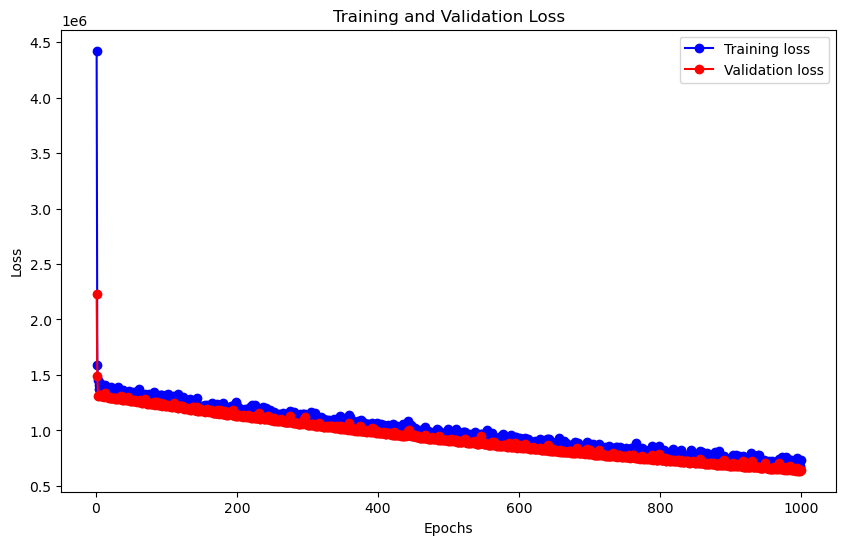

In [28]:
import matplotlib.pyplot as plt

# Extract the history of training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [30]:
# Checking the models overall performance
from sklearn.metrics import mean_absolute_error, r2_score

# Use the model to predict the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-squared (R²) score
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Mean Absolute Error (MAE): 139.12113388950175
R-squared (R²): -0.5014453112882999


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - loss: 4815110.0000 - val_loss: 4593423.5000
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4499642.0000 - val_loss: 4590291.5000
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4820462.0000 - val_loss: 4586160.5000
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 4611258.5000 - val_loss: 4580605.5000
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4337297.0000 - val_loss: 4573331.5000
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4513374.5000 - val_loss: 4563845.0000
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 4370944.0000 - val_loss: 4551504.0000
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 4240019.5000 - val_loss: 4535713.5000
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4273914.5000 - val_loss: 4515761.5000
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4441783.5000 - val_loss: 4490897.0000
Epoch 11/1000
2/2 ━━━━━━━━━━

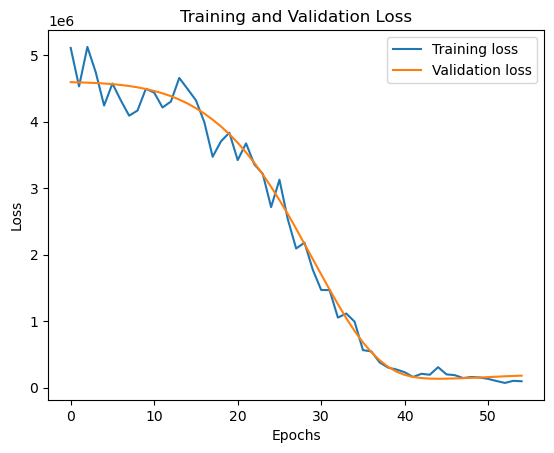

In [38]:
#Retrying the model with some additional hyperparameter tuning
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the Keras model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(50, activation='relu', kernel_regularizer=l2(0.01)), 
    Dense(y_train.shape[1])  # Output layer
])

# Compile the model with Adam optimizer and a learning rate of 0.1
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)



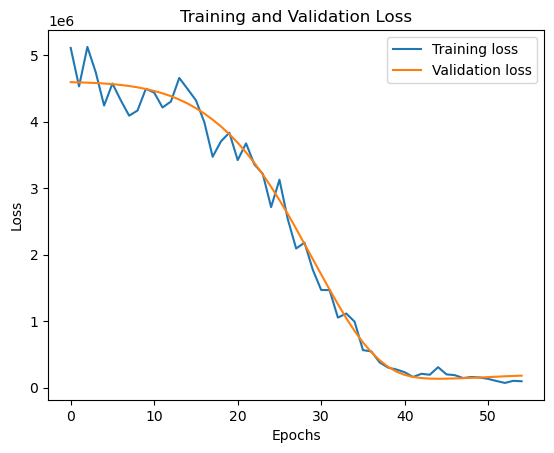

In [41]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:

# Print the mean squared error on the test set
print(f"Mean Squared Error on Test Set: {mse_test}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error on Test Set: 129625.6640625
Mean Absolute Error (MAE): 139.12113388950175
R-squared (R²): -0.5014453112882999


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared - This measures how Ill the observed outcomes are replicated by the model
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error - This measures the average magnitude of the errors in a set of predictions
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared (R²): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
R-squared (R²): -6.2124544507142705
Mean Absolute Error (MAE): 151.5745804054087


X_train shape: (42, 6)
y_train shape: (42, 4)
Features Statistics:
Mean: 
[-0.078999    0.026333   -0.05828247 -0.16753991  0.02497217  0.01576505]
Standard Deviation: 
[1.02557127 1.02827227 1.03922949 0.94753873 1.007549   0.94428153]
Min: 
[-2.63224653 -2.63224653 -2.54124269 -2.69091022 -2.01344968 -2.648529  ]
Max: 
[2.63224653 2.63224653 2.40784412 1.1051804  1.23256805 1.10355375]
Target Statistics:
Mean: Etch Rate - Rp (Å/min)           4173.690476
Etch Uniformity – U (in %)         12.169048
Oxide Selectivity - Sox             6.658333
Photoresist Selectivity - Sph       2.141190
dtype: float64
Standard Deviation: Etch Rate - Rp (Å/min)           719.540012
Etch Uniformity – U (in %)        10.597135
Oxide Selectivity - Sox            1.748789
Photoresist Selectivity - Sph      0.461637
dtype: float64
Min: Etch Rate - Rp (Å/min)           2704.00
Etch Uniformity – U (in %)          0.50
Oxide Selectivity - Sox             2.65
Photoresist Selectivity - Sph       1.32
dtype: fl

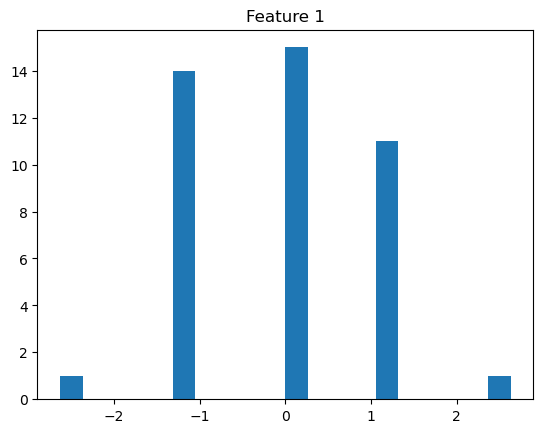

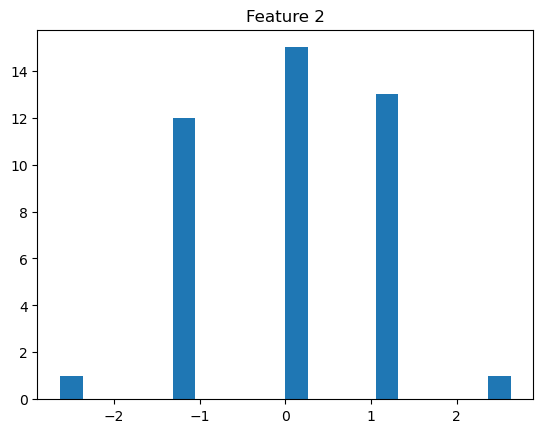

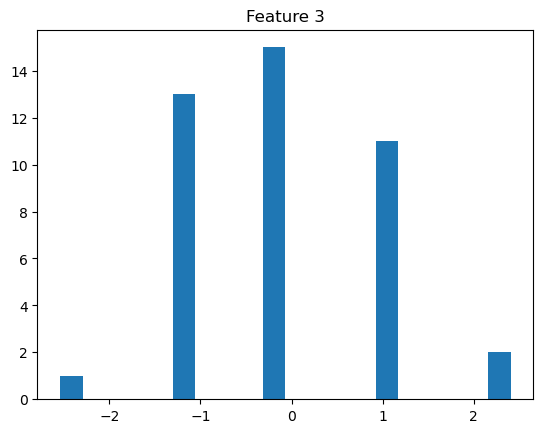

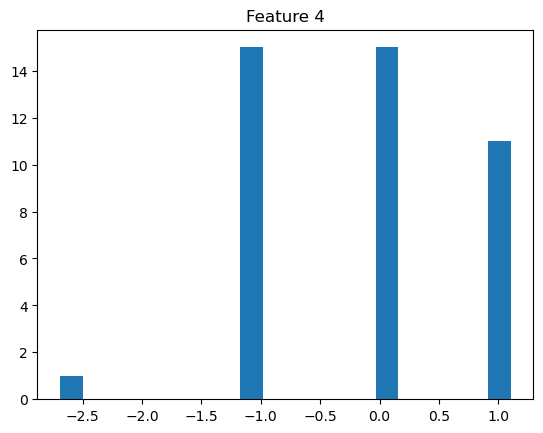

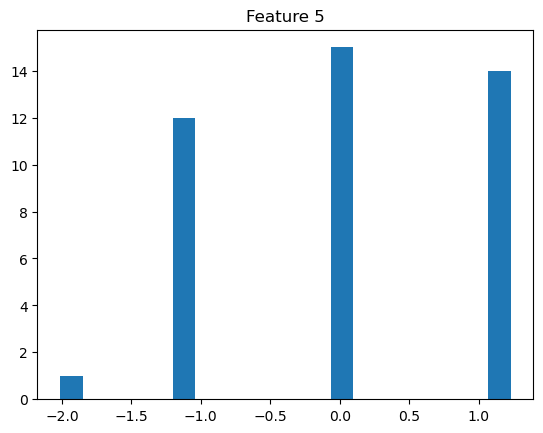

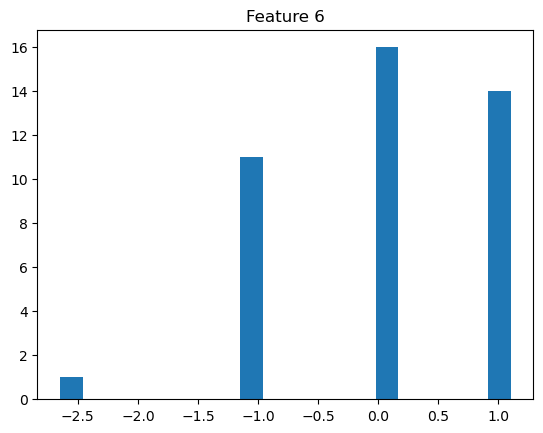

In [45]:
# Assuming X_train and y_train are numpy arrays

# Print the shapes of the arrays
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Summary statistics for features
print("Features Statistics:")
print(f"Mean: \n{X_train.mean(axis=0)}")
print(f"Standard Deviation: \n{X_train.std(axis=0)}")
print(f"Min: \n{X_train.min(axis=0)}")
print(f"Max: \n{X_train.max(axis=0)}")

# Summary statistics for target variable
print("Target Statistics:")
print(f"Mean: {y_train.mean(axis=0)}")
print(f"Standard Deviation: {y_train.std(axis=0)}")
print(f"Min: {y_train.min(axis=0)}")
print(f"Max: {y_train.max(axis=0)}")

# Histograms for features
# You can use matplotlib to create histograms for each feature in X_train
for i in range(X_train.shape[1]):
    plt.hist(X_train[:, i], bins=20)
    plt.title(f'Feature {i+1}')
    plt.show()


In [49]:
# Additional imports if needed
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# Normalize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Normalize target variables, ensuring they are numpy arrays before reshaping
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))

# Model definition with corrected target shape
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(y_train_scaled.shape[1])
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Fit the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=1000, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
mse_test = model.evaluate(X_test_scaled, y_test_scaled)

# Generate predictions and inverse transform
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate metrics
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print metrics
print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"R-squared (R²): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - loss: 1.5510 - val_loss: 1.1317
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.1549 - val_loss: 0.9493
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.2362 - val_loss: 1.2080
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.1099 - val_loss: 1.3675
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.1701 - val_loss: 1.2434
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 1.0342 - val_loss: 1.0502
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.8566 - val_loss: 0.9057
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9027 - val_loss: 0.8453
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.7965 - val_loss: 0.8420
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.7151 - val_loss: 0.8598
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6674 - val_loss: 0.8820
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 11
'y' sizes: 44


In [50]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)


(42, 6)
(11, 6)
(168, 1)
(44, 1)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Feature selection: Assuming 'Run' column is just an identifier and not a feature, I'll drop it
X = data.drop(['Run', 'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph'], axis=1)
y = data[['Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize target variables
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 440ms/step - loss: 1.1555 - mse: 1.2215 - r_squared: -0.3708 - val_loss: 0.6735 - val_mse: 0.5573 - val_r_squared: -0.0888
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.0678 - mse: 1.2602 - r_squared: -0.7247 - val_loss: 0.6723 - val_mse: 0.5562 - val_r_squared: -0.0867
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.9594 - mse: 1.1695 - r_squared: -0.0678 - val_loss: 0.6711 - val_mse: 0.5551 - val_r_squared: -0.0845
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.9888 - mse: 1.1858 - r_squared: -0.1009 - val_loss: 0.6700 - val_mse: 0.5540 - val_r_squared: -0.0825
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.9844 - mse: 1.1812 - r_squared: -0.2664 - val_loss: 0.6690 - val_mse: 0.5531 - val_r_squared: -0.0806
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.2862 - mse: 1.1648 - r_squared: -0.0979 - val_loss: 0.6680 - val_mse: 0.5522 - val_r_squared: -0.0789
Epoch 7/300
2/2 ━━━━━━━━━━━

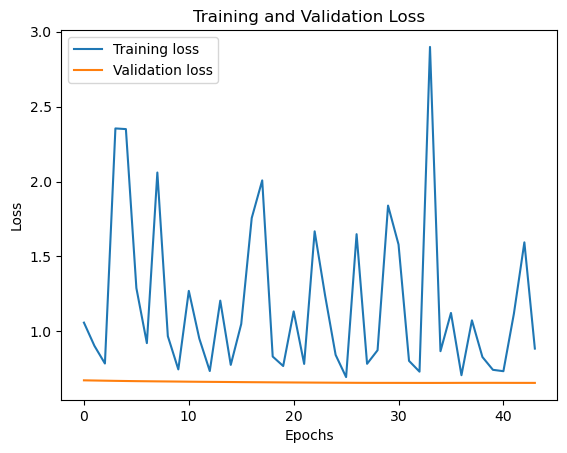

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Definining custom R^2 metric for TensorFlow
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Build the neural network model with dropout layers
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(y_train_scaled.shape[1]) 
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='mse', 
              metrics=['mse', r_squared])

# Fit the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
history = model.fit(X_train_scaled, y_train_scaled, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
_, mse, r2_train = model.evaluate(X_train_scaled, y_train_scaled, verbose=0)
_, _, r2_test = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'Training R^2 score: {r2_train:.3f}')
print(f'Testing R^2 score: {r2_test:.3f}')

# Predict and inverse transform if needed
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Make sure scaler_y is defined and fitted to your target variable

# Calculate R^2 and MAE for evaluation
print(f'Aggregate R^2 score: {r2_score(y_test, y_pred):.3f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.3f}')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Report

### Title: Development and Iterative Improvement of an MLP Neural Network Model for Semiconductor Plasma Etching Process

### Introduction:

This report documents the data processing and development process of an empirical model for predicting the performance of a reactive-ion plasma etching process, a critical component in semiconductor manufacturing. The project aims to utilize machine learning techniques to characterize the behavior of this complex system, given the challenges associated with first-principle physics-based models.


### Data Description:

The dataset comprises experimental results focusing on the etch characteristics of n+-doped polysilicon using several process parameters:

- Chamber pressure and poIr (RF)
- Electrode gap
- Gas flows (CCl4, He, O2)

The outcomes being predicted include:

- Etch rate (Rp)
- Uniformity (U)
- Selectivities for oxide (Sox) and photoresist (Sph)

Initial Modeling Approach:

The initial approach involved developing models using Multilayer Perceptron (MLP) networks with the following steps:

1. Data Preprocessing: The dataset was loaded and standardized to bring all numerical features onto a similar scale.

2. Feature Selection: I considered all process parameters as relevant features while the 'Run' identifier was dropped.

3. Model Architecture: A neural network model with multiple hidden layers was designed. Activation functions and solver algorithms Ire selected based on typical efficacy.

4. Training and Evaluation: The model was trained and evaluated using Mean Squared Error (MSE), MAE, and R-squared (R²) as performance metrics.

### Issues and Iterative Improvements:
Issues and Iterative Improvements:

Developing an empirical model to predict outcomes of the plasma etching process proved to be a very complex task, with various challenges that necessitated a methodical and iterative approach to model building and refinement.

1. Convergence Problems:
    - My initial models faced difficulty converging, as evidenced by the lack of improvement in loss values over multiple training epochs.
    - To address this, I increased the number of iterations, allowing the models more opportunity to learn and adjust weights.
    - I also experimented with the model’s architecture, adding and removing layers and neurons to match the model’s complexity with our dataset's intricacy and volume.

2. Performance Metrics:
    - Early versions of the model generated negative R² values, signifying that the predictions were far worse than a simple model that would have predicted the mean value of the target variables consistently.
    - The Mean Absolute Error (MAE) of the models was also substantially high, indicating a significant average deviation from the actual values.
    - I addressed these issues by scrutinizing the model outputs and iteratively refining our approach to better capture the underlying data distribution.

3. Hyperparameter Tuning:
    - An extensive hyperparameter tuning process was undertaken, involving the fine-tuning of learning rates, which influence the steps the model takes towards optimization.
    - I shifted between activation functions, moving from `relu` to `tanh` and back, to determine the most effective function for our model based on the performance metrics.
    - I also transitioned from the SGD optimizer to Adam, as Adam’s adaptive learning rate mechanisms showed potential for more stable and consistent learning.

4. Model Simplification:
    - Given the volume and complexity of the dataset, I developed a hypotheses that a less complex model might perform better due to the potential overfitting with more complex models.
    - A reduction in the number of hidden layers resulted in a more parsimonious model, which not only converged more reliably but also showed improved loss convergence, indicating a better fit to the training and validation datasets.

5. Model Assessment:
    - With each iteration, I thoroughly evaluated the model using both visual and quantitative metrics.
    - Training and validation loss plots were examined to assess learning trends and convergence behaviors.
    - The R² and MAE values were continually monitored to gauge the model’s predictive performance, ensuring that each adjustment led closer to the goal of a reliable predictive model.

Throughout this rigorous process, every decision and adjustment was made with a dual focus on achieving convergence and improving predictive accuracy. The journey from initial concept to the current iteration of the model involved numerous experiments and evaluations to ensure that every aspect of the model served the ultimate goal of accurately predicting the etch rates and selectivities of the plasma etching process. 

### Current Status:

The latest model iterations included further tuning of hyperparameters and experimentation with the batch size, as well as experimentation with scaling and inverse scaling of the data. While the models showed improved learning curves, with training and validation losses converging, the performance metrics such as the R² score and MAE did not reach the desired levels. Specifically, changes in batch size affected the model's ability to generalize, as indicated by the performance metrics after such adjustments.

### Next Steps:

1. Further Model Tuning: Additional adjustments to the model architecture and hyperparameters could be considered.

2. Feature Engineering: New features could be created, and more in-depth analysis of the data may reveal additional insights.

3. Alternative Models: Given the challenges with the current approach, alternative modeling techniques such as ensemble methods could be explored.

4. Acquire More Data: Collecting more data could be beneficial to improve the model's ability to learn and generalize.

5. Domain Expertise: Collaboration with domain experts may certainly offer new perspectives and insights into the most relevant features and model forms.

